## <a href="https://velog.io/write?id=914a2c89-5ca5-49de-90ea-a888ab620bb6">토픽모델링 - LDA : Latent Dirichlet Allocation</a>

In [147]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from string import punctuation
from konlpy.tag import Kkma
import time
import datetime
import gensim
from gensim import corpora, models
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

In [188]:
df = pd.read_excel('./news_data/2020_03.xlsx', index_col='Unnamed: 0')
small_range = list(range(5))
df = df.iloc[small_range, :]

In [189]:
df

,naver_news_title,naver_news_articles
0,"제주도관광협회, 코로나19에 회원사 1분기 회비 면제","제주도관광협회, 코로나19에 회원사 1분기 회비 면제 - 노컷뉴스 전체메뉴보기 노컷..."
1,남미 여행 후 '제주도' 관광하다 코로나 확진 받은 여대생은 '마스크'를 쓰지...,남미 여행 후 ‘제주도’ 관광하다 코로나 확진 받은 여대생은 ‘마스크’를 쓰지 않았...
2,"제주도 자가격리 무시, 공항 도주 관광객 '강제 격리'","제주도 자가격리 무시, 공항 도주 관광객 '강제 격리' - 뉴스제주 × 전체기사 사..."
3,"'제주 관광' 美유학생, 동행한 어머니 코로나19 확진…제주도 ""민사소송 검토...","`제주 관광` 美유학생, 동행한 어머니 코로나19 확진…제주도 `민사소송 검토` -..."
4,"“이기적 관광객 필요없다”…제주도, 유증상에도 여행한 확진자에 손배소","“이기적 관광객 필요없다”…제주도, 유증상에도 여행한 확진자에 손배소 본문바로가기문..."


In [190]:
content = list(df['naver_news_articles'])

In [191]:
# 구두점 제거
def strip_punctuation(s):
    return ''.join(c for c in str(s) if c not in punctuation)

In [192]:
clean_c = []
for sent in content:
    clean = strip_punctuation(sent)
    clean_c.append(clean)

clean_c

['제주도관광협회 코로나19에 회원사 1분기 회비 면제  노컷뉴스 전체메뉴보기 노컷뉴스메인가기 제주도관광협회 코로나19에 회원사 1분기 회비 면제 뉴스듣기 0 페이스북 트위터 밴드 카카오톡 URL 폰트사이즈   인쇄 CBS 전국 네트워크 강원 경남 광주 대구 대전 부산 영동 울산 전남 전북 제주 청주 포항 닫기 크리스천뉴스 노컷비즈 노컷TV 노컷뉴스 전국 최신 정치 사회 전국 경제 산업 국제 문화 연예 스포츠 오피니언 포토 그래픽 노컷브이 핫이슈 스페셜 기획 제보 네이버 구독 다음 구독 카카오 구독 삭제 검색 자동완성 끄기 뉴스 정치 사회 전국 경제 산업 국제 문화 연예 스포츠 지역 서울 경인 강원 경남 광주 대구 대전 부산 영동 울산 전남 전북 제주 청주 포항 일반 이슈 핫이슈 스페셜 기획 딥뉴스 노컷체크 인터랙티브 타임라인 시사 김현정의 뉴스쇼 한판승부 김덕기의 아침뉴스 정다운의 뉴스톡 530 오피니언 칼럼 뒤끝작렬 기고 노컷브이 그래픽 포토 노컷TV 씨리얼 팟캐스트 닫기 전국 제주 제주도관광협회 코로나19에 회원사 1분기 회비 면제 제주CBS 박정섭 기자 메일보내기 20200330 1358 뉴스듣기 0 페이스북 트위터 밴드 카카오톡 URL 폰트사이즈   인쇄 회원과 고통 분담 차원서 2억6천만원 면제62년 설립 이후 처음 제주도관광협회가 들어서 있는 제주종합비즈니스센터 제주도관광협회가 코로나19 여파로 피해가 큰 회원사들을 위해 1분기 회비를 면제한다 제주도관광협회 이사회는 최근 서면 결의를 통해 코로나19 확산에 따른 경기 위축과 회원의 어려움을 함께 하기 위해 1분기 회비를 면제하기로 했다1분기 회비는 2억6000여만원으로 제주도관광협회가 회비를 면제한 건 지난 62년 협회 설립 이후 처음이다제주도관광협회는 대신 자체사업과 관리비 삭감 등을 통해 회원사 고통분담에 동참하기로 했다앞서 제주도관광협회는 제주도관광진흥기금의 지원대상과 규모를 확대하고 신속한 행정처리를 위해 제주웰컴센터에 설치된 제주관광진흥기금 특별지원센터에 인력을 파견하고 있다또 소독제와 

In [193]:
kkma = Kkma()

In [194]:
start = time.time()

In [195]:
# 한글 알파벳 외 공백
dataset = []
for i in range(len(clean_c)):
    dataset.append(kkma.nouns(re.sub('[^가-힣a-zA-Z`s]',  '', clean_c[i])))
    
sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print(times)

0:00:13


In [197]:
high_score_reviews = dataset

In [198]:
high_score_reviews = [[y for y in x if not len(y) == 1]
                  for x in high_score_reviews]
dictionary = corpora.Dictionary(high_score_reviews)
corpus = [dictionary.doc2bow(text) for text in high_score_reviews]

In [199]:
# Perplexity 및 Coherence를 통한 모델 평가 및 토픽 최적화
coherence_values = []
for i in range(2, 15):
    idamodel = gensim.models.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=idamodel, texts=high_score_reviews, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

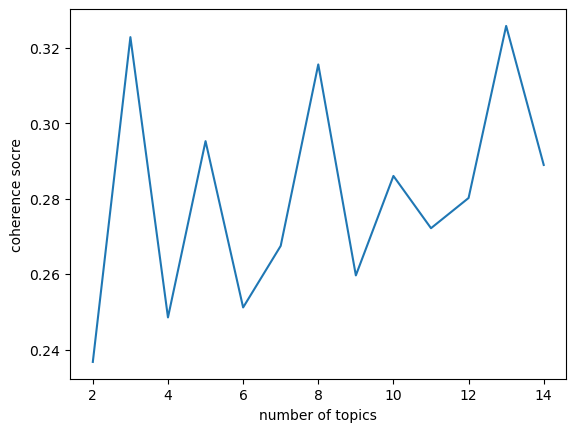

In [200]:
x = range(2, 15)
plt.plot(x, coherence_values)
plt.xlabel('number of topics')
plt.ylabel('coherence socre')
plt.show()

In [201]:
import matplotlib.pyplot as plt
perplexity_values = []
for i in range(2, 20):
    idamodel = gensim.models.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(idamodel.log_perplexity(corpus))

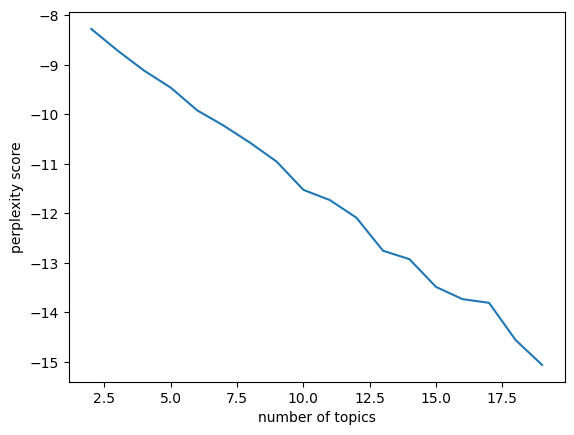

In [202]:
x = range(2, 20)
plt.plot(x, perplexity_values)
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.show()

In [203]:
# 갯수 수정
ldamodel = gensim.models.LdaModel(corpus, num_topics=6, alpha=0.1, id2word=dictionary)

In [204]:
ldamodel.print_topics(num_words=100)

[(0,
  '0.003*"제주" + 0.001*"보호" + 0.001*"광고" + 0.001*"제주도" + 0.001*"코로나" + 0.001*"경제" + 0.001*"스포츠" + 0.001*"처리" + 0.001*"서울" + 0.001*"기자" + 0.001*"방침" + 0.001*"발행" + 0.001*"오늘" + 0.001*"문화" + 0.001*"검사" + 0.001*"사회" + 0.001*"청소년" + 0.001*"정보" + 0.001*"트위터" + 0.001*"사고" + 0.001*"개인" + 0.001*"피해" + 0.001*"이용" + 0.001*"콘텐츠" + 0.001*"산업" + 0.001*"복사" + 0.001*"전체" + 0.001*"뉴스" + 0.001*"저작권법" + 0.001*"모든" + 0.001*"일자" + 0.001*"카카오" + 0.001*"취급" + 0.001*"번호" + 0.001*"국민" + 0.001*"대신" + 0.001*"이슈" + 0.001*"페이스" + 0.001*"등록" + 0.001*"방역" + 0.001*"헬스" + 0.001*"편집인" + 0.001*"오피니언" + 0.001*"부산" + 0.001*"최신" + 0.001*"회사" + 0.001*"전재" + 0.001*"전국" + 0.001*"제휴" + 0.001*"소개" + 0.001*"강남" + 0.001*"가기" + 0.001*"병원" + 0.001*"삭제" + 0.001*"책임자" + 0.001*"보기" + 0.001*"편집" + 0.001*"울산" + 0.001*"제보" + 0.001*"등방역" + 0.001*"국제" + 0.001*"선별" + 0.001*"해외여행" + 0.001*"메일" + 0.001*"메뉴" + 0.001*"개월" + 0.001*"증상" + 0.001*"입력" + 0.001*"사업" + 0.001*"제재" + 0.001*"관광" + 0.001*"지원" + 0.001*"연예" + 0.001*"노컷" + 0.001*"방문" + 

In [205]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
vis

/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated i

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.003009  0.008787       1        1  43.455098
5     -0.007700  0.004723       2        1  25.296106
3      0.000137 -0.002014       3        1  16.115981
2      0.016937 -0.001981       4        1  14.146624
4     -0.012834 -0.003617       5        1   0.967961
0      0.000451 -0.005898       6        1   0.018230, topic_info=     Term      Freq     Total Category  logprob  loglift
270    제주  5.000000  5.000000  Default  30.0000  30.0000
133    보호  3.000000  3.000000  Default  29.0000  29.0000
30     광고  3.000000  3.000000  Default  28.0000  28.0000
273   제주도  3.000000  3.000000  Default  27.0000  27.0000
16     경제  3.000000  3.000000  Default  26.0000  26.0000
..    ...       ...       ...      ...      ...      ...
229    이용  0.000538  3.488198   Topic6  -6.8345  -0.1674
249  저작권법  0.000520  2.901896   Topic6  -6.8674  -0.0163
334   콘텐츠  0.000534  3.466307   Topic6  -6.8424  -0.1690
63     뉴스  0.000524  3.408475   Topic6  -6.8612  -0.1710
110    모든  0.000507  2.775541   Topic6  -6.8929   0.0027

[473 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.423190   가기
392       1  0.536109   강남
392       2  0.268054   강남
392       3  0.268054   강남
393       1  0.497421  강남구
...     ...       ...  ...
369       1  0.669053   협회
370       1  0.653533   혜성
377       1  0.450078   회원
1141      1  0.377440   희룡
1141      2  0.377440   희룡

[305 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 4, 3, 5, 1])

In [210]:
kk = ldamodel.show_topic(4, topn=80000)
type(ldamodel.show_topic)
kk2 = pd.DataFrame(kk)
kk2.head(30)
ls = list(kk2[0][:5])

In [211]:
ls

['제주', '책임자', '광고', '피해', '강남구']

In [250]:
def get_topic_list(i, j):
    y, m = i, j
    df = pd.read_excel(f'./news_data/{i}_{j}.xlsx', index_col='Unnamed: 0')
    small_range = list(range(5))
    df = df.iloc[small_range, :]
    content = list(df['naver_news_articles'])
    clean_c = []
    for sent in content:
        clean = strip_punctuation(sent)
        clean_c.append(clean)
    kkma = Kkma()
    # 한글 알파벳 외 공백
    dataset = []
    for i in range(len(clean_c)):
        dataset.append(kkma.nouns(re.sub('[^가-힣a-zA-Z`s]',  '', clean_c[i])))
    sec = time.time()-start
    times = str(datetime.timedelta(seconds=sec)).split(".")
    times = times[0]
    high_score_reviews = dataset
    high_score_reviews = [[y for y in x if not len(y) == 1] for x in high_score_reviews]
    dictionary = corpora.Dictionary(high_score_reviews)
    corpus = [dictionary.doc2bow(text) for text in high_score_reviews]
    coherence_values = []
    for i in range(2, 15):
        idamodel = gensim.models.LdaModel(corpus, num_topics=i, id2word=dictionary)
        coherence_model_lda = CoherenceModel(model=idamodel, texts=high_score_reviews, dictionary=dictionary, topn=10)
        coherence_lda = coherence_model_lda.get_coherence()
        coherence_values.append(coherence_lda)
    ldamodel = gensim.models.LdaModel(corpus, num_topics=6, alpha=0.1, id2word=dictionary)
    kk = ldamodel.show_topic(4, topn=80000)
    type(ldamodel.show_topic)
    kk2 = pd.DataFrame(kk)
    kk2.head(30)
    ls = list(kk2[0][:5])
    df_s = pd.DataFrame([ls])
    df_s.columns = ['1', '2', '3', '4', '5']
    df_s['date'] = [f'{y}_{m}']
    return df_s

In [251]:
df = df = pd.DataFrame(columns=['1', '2', '3', '4', '5', 'date'])
for i in range(2015, 2022):
    for j in range(1, 13):
        if j < 10:
            j = '0' + str(j)
        df_s = get_topic_list(i, j)
        df = pd.concat([df, df_s], ignore_index=True)

/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))
/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:202: RuntimeWarning: invalid value encountered in divide
  numerator = (co_occur_count / num_docs) + EPSILON
/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:203: RuntimeWarning: invalid value encountered in divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
/Users/jin-yulim/miniforge3

/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:202: RuntimeWarning: invalid value encountered in divide
  numerator = (co_occur_count / num_docs) + EPSILON
/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:203: RuntimeWarning: invalid value encountered in divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:198: RuntimeWarning: invalid value encountered in divide
  co_doc_prob = co_occur_count / num_docs
/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-pac

/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))
/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:202: RuntimeWarning: invalid value encountered in divide
  numerator = (co_occur_count / num_docs) + EPSILON
/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:203: RuntimeWarning: invalid value encountered in divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
/Users/jin-yulim/miniforge3

In [252]:
df

,1,2,3,4,5,date
0,제주,관광,영상,기자,등록,2015_01
1,제주,등록,금지,한림,제공,2015_02
2,제주,모바일,단독,검색,경찰,2015_03
3,제주,제주도,한국,기간,우리,2015_04
4,검색,입력,제주,대표,뉴스,2015_05
...,...,...,...,...,...,...
79,제주,교육,전체,관련,코로나,2021_08
80,제주,하다,경제,기간,서비스,2021_09
81,번호,방침,발행인,모습,정책,2021_10
82,제주,전재,영상,관광,지역,2021_11


In [253]:
df.to_csv('./data/topic.csv')